# 17.0 简介

## 核心知识点
- 支持向量机（SVM）的核心是寻找一个最大化分类间距的超平面，以此对数据进行分类。
- 超平面是 n 维空间中的 n-1 维空间，例如在二维空间中是一条直线，在三维空间中是一个平面。
- 超平面两侧的 “间隔带” 越宽，模型的泛化能力越强。
- 本章将介绍线性 SVM、核函数处理非线性数据、预测概率、识别支持向量及处理不均衡分类等核心应用。

# 17,1 训练一个线性分类器

问题描述:
训练一个线性 SVM 对观察值进行分类。

In [1]:
# 加载库
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# 加载数据，数据里只有两种分类和两个特征
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

# 标准化特征
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建支持向量机分类
svc = LinearSVC(C = 1.0)

# 训练模型
model = svc.fit(features_standardized, target)

C:\Users\24677\anaconda3\envs\ml\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


画出超平面：

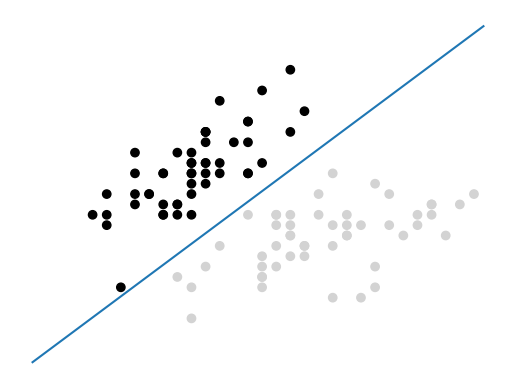

((-2.75, 2.75, -3.5353347392976526, 3.954071052718478), None)

In [2]:
# 加载库
from matplotlib import pyplot as plt
import numpy as np

# 画出样本点，并且根据其分类上色
color = ['black' if c == 0 else 'lightgrey' for c in target]
plt.scatter(features_standardized[:,0],features_standardized[:,1],c=color)

# 创建超平面
w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy = a*xx-(svc.intercept_[0]/w[1])

# 画出超平面
plt.plot(xx,yy)
plt.axis('off'),plt.show()

In [3]:
# 创建一个样本点
new_observation = [[-2,3]]

# 预测新样本点的分类
svc.predict(new_observation)

array([0])

## 核心知识点
1.  线性 SVM：在数据线性可分的情况下，寻找最大化分类间隔的超平面。
2.  超参数 C：控制 “最大化间隔” 和 “最小化分类错误” 的平衡。
    - C 越小：容忍更多的分类错误，间隔更宽，模型更简单（偏差大，方差小）。
    - C 越大：对分类错误惩罚更重，间隔更窄，模型更复杂（偏差小，方差大）。
3.  特征标准化：SVM 对特征尺度非常敏感，训练前必须进行标准化处理。

# 17.2 使用核函数处理线性不可分数据

In [4]:
# 加载库
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 设置随机种子
np.random.seed(0)

# 生成两个特征
features = np.random.randn(200,2)

# 使用异或门创建线性不可分数据
target_xor = np.logical_xor(features[:,0]>0,features[:,1]>0)
target = np.where(target_xor,0,1)

# 创建一个有径向基核函数的支持向量机
svc = SVC(kernel='rbf',random_state = 0,C=1,gamma=1)

# 训练分类器
model = svc.fit(features,target)

可视化：

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier):
    cmap = ListedColormap(('red','blue'))
    xx1,xx2 = np.meshgrid(np.arange(-3,3,0.02),np.arange(-3,3,0.02))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.1,cmap=cmap)
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = cmap(idx),
                    marker='+',label=cl)

In [12]:
# 创建一个使用线性核函数的SVC
svc_linear = SVC(kernel = 'linear',random_state = 0,C=1)

# 训练模型
svc_linear.fit(features,target)

SVC(C = 1,cache_size=200,class_weight=None,coef0 = 0.0,decision_function_shape='ovr',degree=3,gamma = 'auto',kernel = 'linear',max_iter=-1,probability=False,random_state=0,shrinking=True,tol=0.001,verbose=False)

SVC(C=1, gamma='auto', kernel='linear', random_state=0)

C:\Users\24677\AppData\Local\Temp\ipykernel_26524\3062463827.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


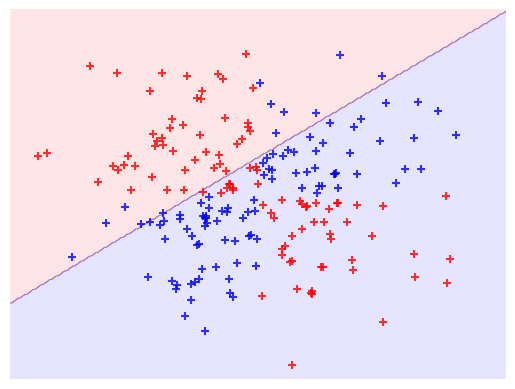

((-3.0, 2.9800000000000058, -3.0, 2.9800000000000058), None)

In [13]:
# 画出观察值和超平面
plot_decision_regions(features,target, classifier=svc_linear)
plt.axis('off'),plt.show()

In [14]:
# 创建一个径向基核函数的SVC
svc = SVC(kernel='rbf',random_state= 0 ,gamma = 1,C = 1)

# 训练这个分类器
model = svc.fit(features,target)

C:\Users\24677\AppData\Local\Temp\ipykernel_26524\3062463827.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


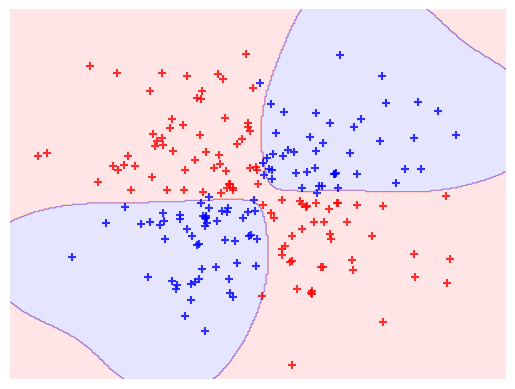

((-3.0, 2.9800000000000058, -3.0, 2.9800000000000058), None)

In [15]:
# 画出观察值和超平面
plot_decision_regions(features,target, classifier=svc)
plt.axis('off'),plt.show()

## 核心知识点

- **核函数**：当数据线性不可分时，通过核函数将数据映射到高维空间，使其变得线性可分，从而创建非线性决策边界。SVM 的预测函数可表示为：
  $$
  f(x) = \beta_0 + \sum_{i \in S} \alpha_i K(x_i, x'_i)
  $$
  其中 \(S\) 是所有支持向量的集合，\(K(x_i, x'_i)\) 是核函数。

- **常用核函数**：
  - 线性核（linear）：
    $$
    K(x_i, x'_i) = \sum_{j=1}^p x_{ij}x'_{ij}
    $$
  - 多项式核（poly）：
    $$
    K(x_i, x'_i) = \left(1 + \sum_{j=1}^d x_{ij}x'_{ij}\right)^2
    $$
  - 径向基核（RBF，最常用）：
    $$
    K(x_i, x'_i) = e^{(-\gamma \sum_{j=1}^p (x_{ij}-x'_{ij})^2)}
    $$

- **关键参数**：
  - `kernel`：选择核函数类型。
  - `gamma`：控制 RBF 核的影响范围，值越小影响范围越广。
  - \(C\)：正则化参数，与线性 SVM 中的作用一致。

# 17.3 计算预测分类的概率

In [17]:
# 加载库
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 标准化特征
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建SVC对象
svc = SVC(kernel='linear',probability=True,random_state=0)

# 训练分类器
model = svc.fit(features_standardized,target)

# 创建一个新的观察值
new_observation = [[0.4,0.4,0.4,0.4]]

# 查看观察值被预测为不同分类的概率
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

# 核心知识点

- SVM 本身不直接输出概率，而是通过 **Platt 缩放（Platt scaling）** 技术，训练一个独立的逻辑回归模型，将 SVM 的输出转换为校准后的概率。

- **Platt 缩放公式（二分类场景）**：
  $$
  P(y = 1|x) = \frac{1}{1 + e^{(A f(x) + B)}}
  $$
  其中 \(f(x)\) 是 SVM 输出的样本到超平面的距离，\(A\) 和 \(B\) 是通过交叉验证训练得到的参数。

- 启用概率输出需要设置 `probability=True`，这会增加训练时间。

- 注意：预测概率和预测类别可能不完全匹配，例如预测类别为 1，但属于类别 1 的概率可能小于 0.5。

# 17.4 识别支持向量

问题描述：
找出决定超平面的关键样本 —— 支持向量。

In [21]:
# 加载库
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#加载数据，数据中只有两个分类
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# 标准化特征
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建SVC分类器
svc = SVC(kernel='linear',random_state=0)

# 训练分类器
model = svc.fit(features_standardized,target)
# 查看支持向量
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [22]:
model.support_

array([23, 41, 57, 98])

In [23]:
model.n_support_

array([2, 2])

## 核心知识点

- **支持向量**：是决定超平面位置的关键样本，位于“间隔带”的边缘。SVM 的名称即来源于此。
- 移除非支持向量不会改变超平面，但移除支持向量会显著影响模型的决策边界。

- **关键属性**：
  - `support_vectors_`：输出支持向量的特征值。
  - `support_`：输出支持向量在原始数据集中的索引。
  - `n_support_`：输出每个分类下的支持向量数量。

# 17.5 处理不均衡的数据

问题描述:
在类别分布严重不均衡的数据集上训练 SVM，避免模型偏向多数类。

In [24]:
# 加载库
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# 加载只有两个分类的数据
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# 接触前40个观察值，让各个分类的数据分布不均匀
features = features[40:,:]
target = target[40:]

# 创建目标向量，数值0代表分类0，其他的分类用数值1表示
target = np.where((target==0),0,1)

# 标准化特征
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建SVC
svc = SVC(kernel='rbf',class_weight='balanced',C=1.0,random_state=0)

# 训练分类器
model = svc.fit(features_standardized,target)

## 核心知识点

- **不均衡分类的影响**：SVM 模型会倾向于预测样本数更多的类别，导致稀有类别的预测性能很差。

- **自动权重调整**：`class_weight="balanced"` 会根据类别频率自动计算惩罚权重，公式为：
  $$
  C_j = C \times w_j, \quad w_j = \frac{n}{k n_j}
  $$
  - $C_j$：类别j的惩罚参数。
  - $w_j$：类别j的权重，与样本数成反比。
  - $n$：总样本数，$n_j$：类别j的样本数，$k$：类别总数。

- **效果**：增大稀有类别的惩罚权重，使模型在训练时更关注稀有类别的分类错误，纠正数据不均衡问题。

---

## 第17章 支持向量机（SVM）核心总结

## 一、核心思想
支持向量机（SVM）的目标是找到一个**最大化分类间隔的超平面**，以此对数据进行分类。超平面两侧的“间隔带”越宽，模型的泛化能力越强。

---

## 二、核心应用场景与方法

### 1. 训练线性分类器（17.1）
- **适用场景**：数据线性可分。
- **核心方法**：使用 `LinearSVC` 或 `SVC(kernel='linear')` 寻找最优超平面。
- **关键超参数 `C`**：控制“最大化间隔”和“最小化分类错误”的平衡。
  - `C` 越小：容忍更多分类错误，间隔更宽，模型更简单（偏差大，方差小）。
  - `C` 越大：对分类错误惩罚更重，间隔更窄，模型更复杂（偏差小，方差大）。
- **重要前提**：SVM对特征尺度非常敏感，**必须先对特征进行标准化**。

### 2. 处理线性不可分数据（17.2）
- **核心思想**：通过**核函数**将数据映射到高维空间，使其变得线性可分，从而创建非线性决策边界。
- **SVM预测函数**：
  $$
  f(x) = \beta_0 + \sum_{i \in S} \alpha_i K(x_i, x_i')
  $$
  其中 \(S\) 是所有支持向量的集合，\(K(x_i, x_i')\) 是核函数。
- **常用核函数**：
  - **线性核（linear）**：适用于线性可分数据。
    $$
    K(x_i, x_i') = \sum_{j=1}^p x_{ij} x_{i'j}
    $$
  - **多项式核（poly）**：处理多项式关系。
    $$
    K(x_i, x_i') = \left(1 + \sum_{j=1}^d x_{ij} x_{i'j}\right)^2
    $$
  - **径向基核（RBF，最常用）**：适用于大多数非线性场景。
    $$
    K(x_i, x_i') = e^{(-\gamma \sum_{j=1}^p (x_{ij} - x_{i'j})^2)}
    $$
- **关键参数**：
  - `kernel`：选择核函数类型。
  - `gamma`：控制RBF核的影响范围，值越小影响范围越广。
  - `C`：正则化参数，与线性SVM中的作用一致。

### 3. 计算预测分类的概率（17.3）
- **核心技术**：SVM本身不直接输出概率，需通过 **Platt缩放（Platt scaling）** 技术，训练一个独立的逻辑回归模型，将SVM的输出转换为校准后的概率。
- **Platt缩放公式（二分类）**：
  $$
  P(y = 1 | x) = \frac{1}{1 + e^{(A \cdot f(x) + B)}}
  $$
  其中 \(f(x)\) 是SVM输出的样本到超平面的距离，\(A\) 和 \(B\) 是通过交叉验证训练得到的参数。
- **scikit-learn实现**：创建模型时设置 `probability=True`，训练后使用 `predict_proba()` 方法获取概率。

### 4. 识别支持向量（17.4）
- **支持向量**：是决定超平面位置的关键样本，位于“间隔带”的边缘。移除非支持向量不会改变超平面，但移除支持向量会显著影响模型。
- **关键属性**：
  - `model.support_vectors_`：输出支持向量的特征值。
  - `model.support_`：输出支持向量在原始数据集中的索引。
  - `model.n_support_`：输出每个分类下的支持向量数量。

### 5. 处理不均衡的分类（17.5）
- **问题**：SVM会倾向于预测样本数更多的类别，导致稀有类别的预测性能很差。
- **解决方案**：使用 `class_weight='balanced'` 参数，根据类别频率自动调整惩罚权重。
- **权重计算公式**：
  $$
  C_j = C \times w_j, \quad w_j = \frac{n}{k n_j}
  $$
  - \(C_j\)：类别\(j\)的惩罚参数。
  - \(w_j\)：类别\(j\)的权重，与样本数成反比。
  - \(n\)：总样本数，\(n_j\)：类别\(j\)的样本数，\(k\)：类别总数。

---

## 三、总结
SVM是一种强大的分类算法，通过最大化分类间隔和核函数技巧，既能处理线性问题，也能高效应对复杂的非线性场景。其核心优势在于对高维数据的适应性和良好的泛化能力，但对特征尺度和超参数（如C、gamma）的选择非常敏感，需要仔细调优。

---
